In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../Resources/MovieData_Clean.csv')
data.head()

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min),Primary Genre
0,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336,124.0,Comedy
1,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615,96.0,Comedy
2,7191,Cloverfield,2008-01-15,25000000.0,170764026.0,tt1060277,PG-13,85 min,"Horror, Sci-Fi, Thriller",Matt Reeves,...,7.0,"358,331",22 Apr 2008,Paramount,Tuesday,January,2008,170.764026,85.0,Horror
3,13121,Teeth,2008-01-18,2000000.0,2340110.0,tt0780622,R,94 min,"Comedy, Fantasy, Horror, Thriller",Mitchell Lichtenstein,...,5.4,"39,939",06 May 2008,Roadside Attractions,Friday,January,2008,2.340110,94.0,Comedy
4,6687,Transsiberian,2008-01-18,15000000.0,5926410.0,tt0800241,R,111 min,"Crime, Drama, Mystery, Thriller",Brad Anderson,...,6.7,"48,581",04 Nov 2008,First Look,Friday,January,2008,5.926410,111.0,Crime


In [3]:
data_df = data[['Title','Day of Release','Month of Release','Revenue (Millions)','IMDB Rating']]
data_df=data_df.dropna()
data_df.head()

,Title,Day of Release,Month of Release,Revenue (Millions),IMDB Rating
0,Wild Child,Tuesday,January,21.972336,6.1
1,First Sunday,Friday,January,38.804615,4.5
2,Cloverfield,Tuesday,January,170.764026,7.0
3,Teeth,Friday,January,2.340110,5.4
4,Transsiberian,Friday,January,5.926410,6.7


In [4]:
day_group = data_df.groupby('Day of Release')
count_days=day_group['Day of Release'].count()
days_df=count_days.to_frame()

days = {'Sunday':1,
         'Monday':2,
         'Tuesday':3,
         'Wednesday': 4,
         'Thursday':5,
         'Friday':6,
         'Saturday':7}
days_df['sorted'] = None

for index, row in days_df.iterrows():
    days_df.loc[index,'sorted']=days[index]


# count_days.loc[count_days['Day of Release']=='Friday']
days_df=days_df.rename(columns={'Day of Release':'Movie Count'})

days_df=days_df.sort_values(by='sorted')
days_df=days_df.drop(columns='sorted')
days_df

,Movie Count
Day of Release,
Sunday,26
Monday,31
Tuesday,62
Wednesday,180
Thursday,185
Friday,1524
Saturday,42


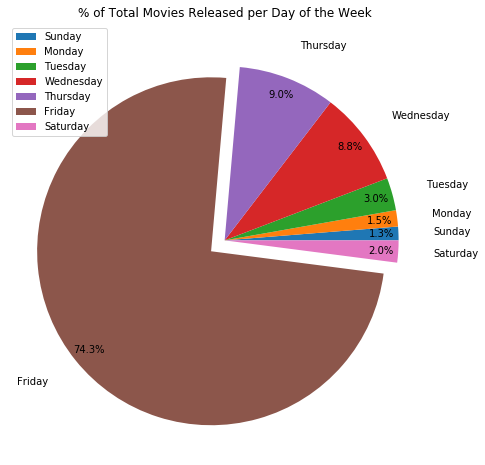

In [5]:
explode = [0, 0, 0, 0, 0, 0.1, 0]
days_df.plot.pie(y='Movie Count',autopct="%1.1f%%",figsize=(8,8),explode=explode,legend=True, pctdistance=.9,labeldistance=1.2,title='% of Total Movies Released per Day of the Week')
plt.ylabel('')
plt.show()

In [6]:
days_df['Total Revenue (Millions)']=day_group['Revenue (Millions)'].sum()
days_df['Average Revenue (Millions)']=day_group['Revenue (Millions)'].mean()
days_df

,Movie Count,Total Revenue (Millions),Average Revenue (Millions)
Day of Release,,,
Sunday,26,2596.558072,99.867618
Monday,31,2235.875797,72.125026
Tuesday,62,7477.505175,120.604922
Wednesday,180,30815.695065,171.198306
Thursday,185,25538.472021,138.045795
Friday,1524,202799.808324,133.070740
Saturday,42,3131.380874,74.556687


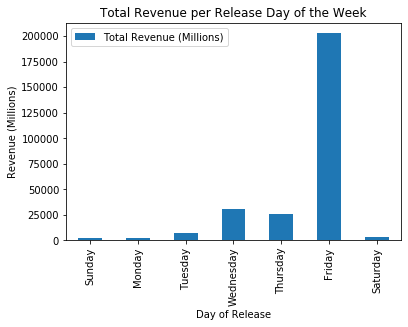

In [7]:
days_df.plot.bar(y='Total Revenue (Millions)',title='Total Revenue per Release Day of the Week')
plt.ylabel('Revenue (Millions)')
plt.show()

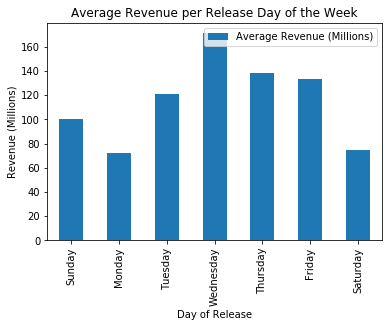

In [8]:
days_df.plot.bar(y='Average Revenue (Millions)',title='Average Revenue per Release Day of the Week')
plt.ylabel('Revenue (Millions)')
plt.show()

In [9]:
days_df['Average Rating']=round(day_group['IMDB Rating'].mean(),1)
days_df

,Movie Count,Total Revenue (Millions),Average Revenue (Millions),Average Rating
Day of Release,,,,
Sunday,26,2596.558072,99.867618,6.5
Monday,31,2235.875797,72.125026,6.6
Tuesday,62,7477.505175,120.604922,6.4
Wednesday,180,30815.695065,171.198306,6.7
Thursday,185,25538.472021,138.045795,6.5
Friday,1524,202799.808324,133.070740,6.4
Saturday,42,3131.380874,74.556687,6.4


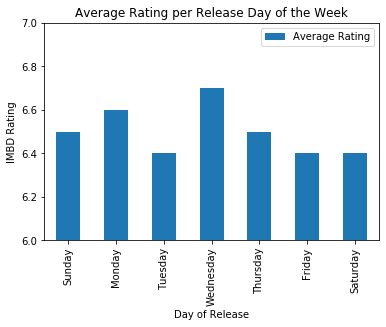

In [10]:
days_df.plot.bar(y='Average Rating', title = 'Average Rating per Release Day of the Week')
plt.ylabel('IMBD Rating')
plt.ylim(6,7)
plt.show()

In [11]:
month_group = data_df.groupby('Month of Release')
count_months=month_group['Month of Release'].count()
months_df=count_months.to_frame()

months = {'January':1,
         'February':2,
         'March':3,
         'April':4,
         'May':5,
         'June':6,
         'July':7,
         'August':8,
         'September':9,
         'October':10,
         'November':11,
         'December':12}

months_df['sorted'] = None

for index, row in months_df.iterrows():
    months_df.loc[index,'sorted']=months[index]


# count_days.loc[count_days['Day of Release']=='Friday']
months_df=months_df.rename(columns={'Month of Release':'Movie Count'})

months_df=months_df.sort_values(by='sorted')
months_df=months_df.drop(columns='sorted')
months_df

,Movie Count
Month of Release,
January,124
February,152
March,174
April,169
May,129
June,156
July,168
August,180
September,193


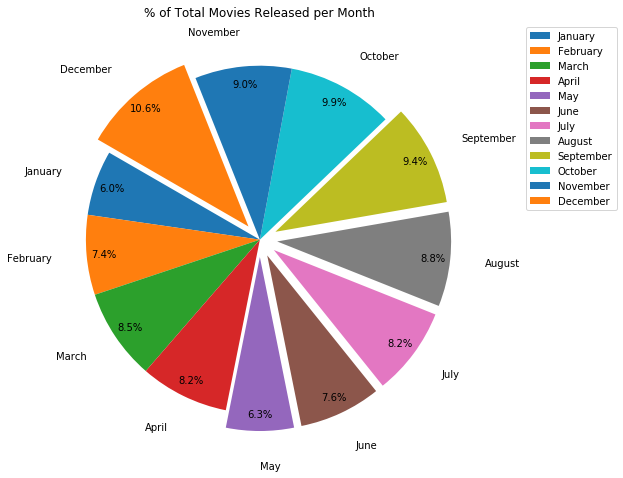

In [21]:
explode = [0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0.1]
months_df.plot.pie(y='Movie Count',autopct="%1.1f%%",figsize=(8,8),explode=explode,legend=True, startangle=150, pctdistance=.9,labeldistance=1.2,title='% of Total Movies Released per Month')
plt.legend(bbox_to_anchor=(1.1,1))
plt.ylabel('') 
plt.show()

In [13]:
months_df['Total Revenue (Millions)'] = month_group['Revenue (Millions)'].sum()
months_df['Average Revenue (Millions)'] = month_group['Revenue (Millions)'].mean()
months_df


,Movie Count,Total Revenue (Millions),Average Revenue (Millions)
Month of Release,,,
January,124,9596.625535,77.392141
February,152,15414.288355,101.409792
March,174,21223.796188,121.975840
April,169,17020.526053,100.713172
May,129,31006.260971,240.358612
June,156,32536.462080,208.567065
July,168,32563.267928,193.828976
August,180,15053.716062,83.631756
September,193,13140.076095,68.083296


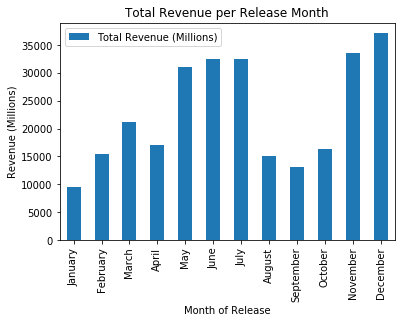

In [14]:
months_df.plot.bar(y='Total Revenue (Millions)',title='Total Revenue per Release Month')
plt.ylabel('Revenue (Millions)')
plt.show()

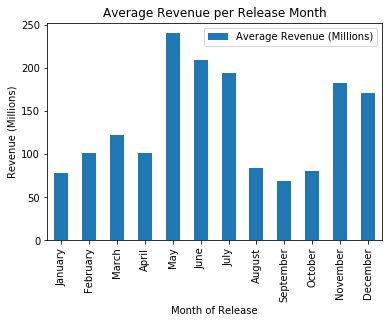

In [15]:
months_df.plot.bar(y='Average Revenue (Millions)',title='Average Revenue per Release Month')
plt.ylabel('Revenue (Millions)')
plt.show()

In [16]:
months_df['Average Rating']= round(month_group['IMDB Rating'].mean(),1)
months_df

,Movie Count,Total Revenue (Millions),Average Revenue (Millions),Average Rating
Month of Release,,,,
January,124,9596.625535,77.392141,6.0
February,152,15414.288355,101.409792,6.2
March,174,21223.796188,121.975840,6.4
April,169,17020.526053,100.713172,6.3
May,129,31006.260971,240.358612,6.5
June,156,32536.462080,208.567065,6.5
July,168,32563.267928,193.828976,6.5
August,180,15053.716062,83.631756,6.4
September,193,13140.076095,68.083296,6.5


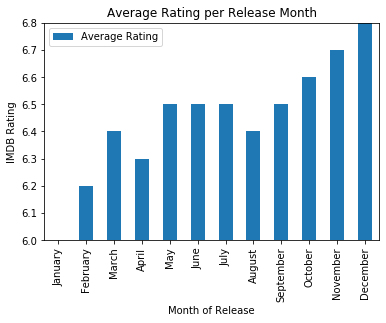

In [17]:
months_df.plot.bar(y='Average Rating',title = 'Average Rating per Release Month')
plt.ylabel('IMDB Rating')
plt.ylim(6,6.8)
plt.show()